In [9]:
from pandas import DataFrame, read_excel, merge, concat, pivot_table, crosstab, melt
import sys
from matplotlib import pyplot as plt
from pandas import read_excel
import numpy as np
import seaborn as sb


In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

# 기술통계 연습문제 (1)

## 문제 1

다음 데이터는 조선시대 역대 왕의 수명을 조사한 데이터이다. 수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/D02/kings_life.xlsx

![q1](res/q1.png) index_col="월

In [4]:
df = read_excel("https://data.hossam.kr/D02/kings_life.xlsx")
df

,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38
5,단종,16
6,세조,51
7,예종,28
8,성종,37
9,연산,30


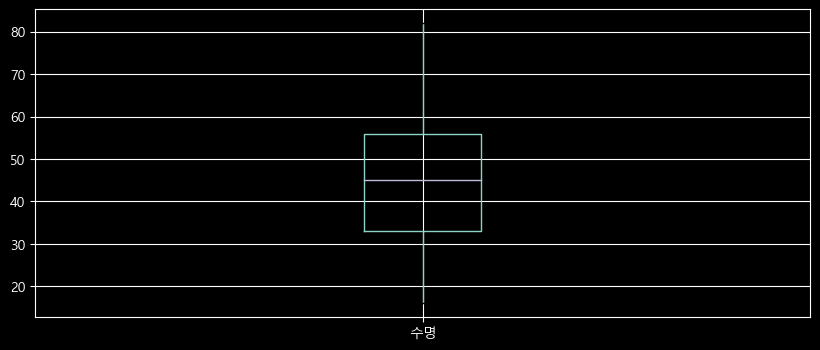

In [17]:
plt.figure()
plt.grid() 
df.boxplot()
plt.show()
plt.close()

In [6]:
평균수명 = df['수명'].mean()
평균수명

46.03703703703704

In [12]:
장수왕 = df['수명'].max()
장수왕

82

In [13]:
단명왕 = df['수명'].min()
단명왕

16

In [11]:
df1 = df.copy()
df1['장수'] = np.where(df1['수명']>=평균수명,'장수','단명')
df1

,왕,수명,장수
0,태조,73,장수
1,정종,62,장수
2,태종,45,단명
3,세종,53,장수
4,문종,38,단명
5,단종,16,단명
6,세조,51,장수
7,예종,28,단명
8,성종,37,단명
9,연산,30,단명


In [19]:
print('조선시대 왕의 평균 수명은 {평균}세 였으며 가장 장수한 왕은 {장수}세, 단명한 왕은 {단명}세로 서거하였다.'.format(평균=round(평균수명),장수=장수왕,단명=단명왕))

조선시대 왕의 평균 수명은 46세 였으며 가장 장수한 왕은 82세, 단명한 왕은 16세로 서거하였다.


## 문제2

다음은 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가이다. 외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/D02/stock.xlsx

![q2](res/q2.png)

In [20]:
df = read_excel("https://data.hossam.kr/D02/stock.xlsx")
df

,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


,주가
구분,
F,1862
K,1810


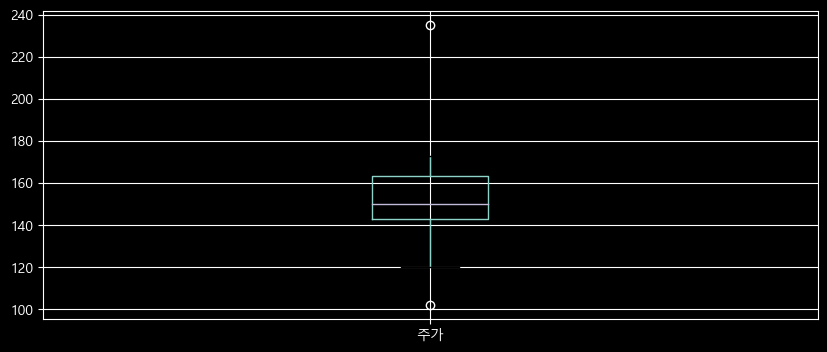

In [21]:
plt.figure()
plt.grid() 
df.boxplot()
plt.show()
plt.close()

## 문제3

포도농장에서 수집한 비료 종류에 따른 수확량 자료이다. 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/D02/grape.xlsx

![q3](res/q3.png)

In [114]:
df = read_excel("https://data.hossam.kr/D02/grape.xlsx")
df

,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8
5,A,28.5
6,A,24.2
7,A,17.9
8,B,16.5
9,B,21.1


In [115]:
df.dtypes

비료종류     object
수확량     float64
dtype: object

In [116]:
# 특정 조건에 맞는 행 조회 
a1 = df.query('비료종류 == "A"')
a1

,비료종류,수확량
0,A,39.3
2,A,26.6
3,A,23.7
5,A,28.5
6,A,24.2
7,A,17.9
10,A,24.3


In [117]:
a1.rename(columns={'수확량':'A수확량'},inplace=True)
a1

C:\Users\User\AppData\Local\Temp\ipykernel_9940\1332144286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1.rename(columns={'수확량':'A수확량'},inplace=True)


,비료종류,A수확량
0,A,39.3
2,A,26.6
3,A,23.7
5,A,28.5
6,A,24.2
7,A,17.9
10,A,24.3


In [118]:
b1 = df.query('비료종류 == "B"')
b1

,비료종류,수확량
1,B,11.4
4,B,25.8
8,B,16.5
9,B,21.1


In [119]:
b1.rename(columns={'수확량':'B수확량'},inplace=True)
b1

C:\Users\User\AppData\Local\Temp\ipykernel_9940\4272773202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b1.rename(columns={'수확량':'B수확량'},inplace=True)


,비료종류,B수확량
1,B,11.4
4,B,25.8
8,B,16.5
9,B,21.1


In [120]:
r1 = concat([a1,b1],ignore_index=True)
r1

,비료종류,A수확량,B수확량
0,A,39.3,NaN
1,A,26.6,NaN
2,A,23.7,NaN
3,A,28.5,NaN
4,A,24.2,NaN
5,A,17.9,NaN
6,A,24.3,NaN
7,B,NaN,11.4
8,B,NaN,25.8
9,B,NaN,16.5


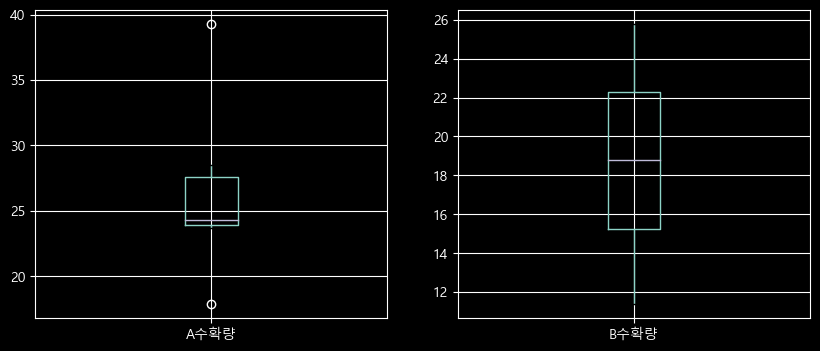

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
a1.boxplot(['A수확량'],ax=ax1)
b1.boxplot(['B수확량'],ax=ax2)
plt.show()
plt.close()

## 문제4

다음은 통계학개론을 수강하는 두 학과(A, C)의 성적분포이다. 이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/D02/analysis_grade.xlsx

![q4](res/q4.png)

In [137]:
학과 = read_excel("https://data.hossam.kr/D02/analysis_grade.xlsx")
학과

,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67
5,C,43
6,A,73
7,C,51
8,C,55
9,A,15


In [143]:
a1 = 학과.query('학과 == "A"')
desc1 = a1.describe()
desc1.rename(columns={'점수':'A학과점수'},inplace=True)
desc1

,A학과점수
count,20.000000
mean,43.750000
std,20.229928
min,10.000000
25%,29.500000
50%,42.500000
75%,55.000000
max,78.000000


In [142]:
c1 = 학과.query('학과 == "C"')
desc2 = c1.describe()
desc2.rename(columns={'점수':'C학과점수'},inplace=True)
desc2

,C학과점수
count,12.000000
mean,56.166667
std,14.689720
min,41.000000
25%,50.250000
50%,52.500000
75%,54.250000
max,90.000000


In [152]:
AC학과점수 = merge(desc1,desc2,left_index=True, right_index=True)
AC학과점수['비고'] = AC학과점수['A학과점수']/AC학과점수['C학과점수']
AC학과점수

,A학과점수,C학과점수,비고
count,20.000000,12.000000,1.666667
mean,43.750000,56.166667,0.778932
std,20.229928,14.689720,1.377149
min,10.000000,41.000000,0.243902
25%,29.500000,50.250000,0.587065
50%,42.500000,52.500000,0.809524
75%,55.000000,54.250000,1.013825
max,78.000000,90.000000,0.866667


In [ ]:
print('A학과와 C학과 ')

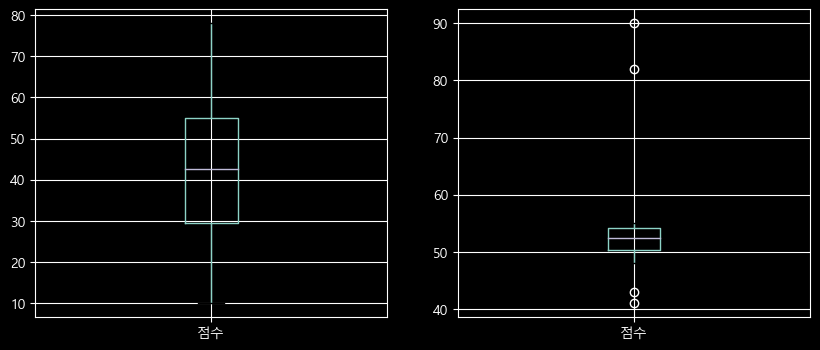

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
a1.boxplot(['점수'],ax=ax1)
c1.boxplot(['점수'],ax=ax2)

plt.show()
plt.close()

## 문제5

![q5](res/q5.png)

다음은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.

(1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

(2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

https://data.hossam.kr/D02/stat_comp_grade.xlsx

In [125]:
df = read_excel("https://data.hossam.kr/D02/stat_comp_grade.xlsx")
df

,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


In [126]:
#(1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.
df1 = df.copy()
df1['전공'] = np.where(df1['전공']=="COMP",'1','2')
df1

,전공,중간고사,기말고사
0,2,34,86
1,2,50,77
2,2,75,74
3,1,76,96
4,1,61,78
5,1,65,40
6,1,31,68
7,2,47,57
8,2,94,82
9,1,49,57


In [127]:
# (2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.
# 전공1의 1등 / 전공2의 1등 <-> 꼴등
# 평균 / 중앙값 / 사분위수 
df2 = df.groupby('전공')
desc = df2.describe()
desc

중간고사                                                      기말고사  \
     count       mean        std   min   25%   50%   75%   max count   
전공                                                                     
COMP   8.0  65.625000  18.423103  31.0  58.0  70.5  77.0  87.0   8.0   
STAT  12.0  64.833333  21.225342  34.0  47.0  67.5  80.5  94.0  12.0   

                                                            
           mean        std   min    25%   50%    75%   max  
전공                                                          
COMP  74.875000  18.795421  40.0  65.25  81.5  86.25  96.0  
STAT  76.166667  13.953386  53.0  67.50  78.5  85.25  95.0

In [128]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [129]:
# (3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라. 

In [133]:
hist, bins = np.histogram(df['중간고사'], bins=5)
info = []
for i, v in enumerate(hist) :
    if i + 1 < len(hist) : # 마지막은 이하라고 표현해야 하므로 
        tpl = '%d 이상 %d 미만'
    else :
        tpl = '%d 이상 %d 이하'

    cls = tpl % (bins[i],bins[i+1])
    line = {'계급':cls,'도수':v}
    info.append(line)

hist_df = DataFrame(info)
hist_df.set_index('계급',inplace=True)

전체데이터수 = len(df)
hist_df['상대도수'] = hist_df['도수']/전체데이터수
hist_df

,도수,상대도수
계급,,
31 이상 43 미만,3,0.15
43 이상 56 미만,4,0.20
56 이상 68 미만,3,0.15
68 이상 81 미만,6,0.30
81 이상 94 이하,4,0.20


In [134]:
hist, bins = np.histogram(df['기말고사'], bins=5)
info = []
for i, v in enumerate(hist) :
    if i + 1 < len(hist) : # 마지막은 이하라고 표현해야 하므로 
        tpl = '%d 이상 %d 미만'
    else :
        tpl = '%d 이상 %d 이하'

    cls = tpl % (bins[i],bins[i+1])
    line = {'계급':cls,'도수':v}
    info.append(line)

hist_df = DataFrame(info)
hist_df.set_index('계급',inplace=True)

전체데이터수 = len(df)
hist_df['상대도수'] = hist_df['도수']/전체데이터수
hist_df

,도수,상대도수
계급,,
40 이상 51 미만,1,0.05
51 이상 62 미만,4,0.20
62 이상 73 미만,2,0.10
73 이상 84 미만,5,0.25
84 이상 96 이하,8,0.40


<Figure size 700x400 with 0 Axes>

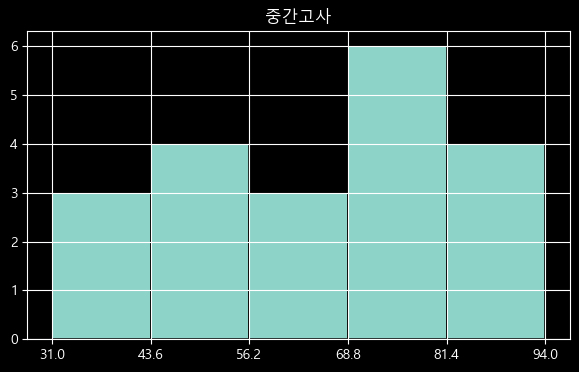

In [112]:
hist, bins = np.histogram(df['중간고사'], bins=5)

plt.figure()
df.hist(column='중간고사', bins=5, edgecolor='black', linewidth=1.2)
plt.xticks(bins, bins) 

plt.show()
plt.close()

<Figure size 700x400 with 0 Axes>

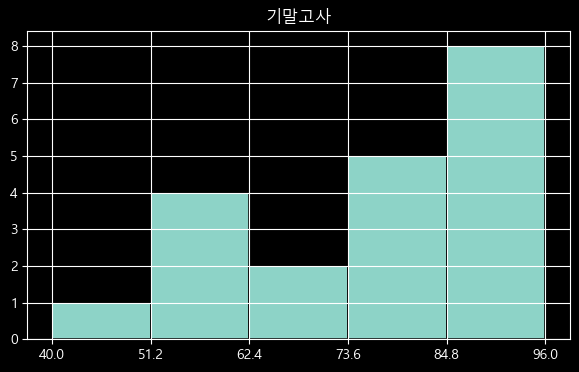

In [113]:
hist, bins = np.histogram(df['기말고사'], bins=5)

plt.figure()
df.hist(column='기말고사', bins=5, edgecolor='black', linewidth=1.2)
plt.xticks(bins, bins) 

plt.show()
plt.close()

In [ ]:
# (4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.